In [2]:
import pandas as pd
results = pd.read_csv("results2.csv")
results

,Specificity,Usefulness,Relevance,Coverage,Fluency,Comments,judge_error,rouge_rouge-1_r,rouge_rouge-1_p,rouge_rouge-1_f,...,NER2NER_total_right_difference_count,NER2NER_total_inter_left_ratio,NER2NER_total_inter_right_ratio,NER2NER_total_inter_all_ratio,source,app,fake_patient_statement,output,fake_first_answer,i
0,3,5,8,2,4,The question about whether the patient has fee...,False,0.083333,0.117647,0.097561,...,1,0.166667,0.5,0.142857,mts,hardcoded,"['""Doctor, my 21 month old son has been having...","Related symptoms are: feet\r,feet,pain\n ...",1,0
1,8,7,9,4,8,"The question about changes in gait, balance, o...",False,0.208333,0.089286,0.125000,...,1,0.071429,0.5,0.066667,mts,RAG_default_workflow,"['""Doctor, my 21 month old son has been having...","For the 56-year-old man: ""You mentioned that y...","I'm sorry doctor, but I believe there may be s...",0
2,8,8,9,6,9,"The question about recent injuries, falls, lim...",False,0.041667,0.058824,0.048780,...,2,0.000000,0.0,0.000000,mts,RAG_workflow,"['""Doctor, my 21 month old son has been having...","""Has your son been experiencing any recent inj...",We haven't noticed any recent injuries or fall...,0
3,8,7,9,6,9,The question is quite specific and relevant to...,False,0.291667,0.132075,0.181818,...,2,0.000000,0.0,0.000000,mts,RAG_workflow_reflection,"['""Doctor, my 21 month old son has been having...","""Has your son had any recent injuries or falls...","No, he hasn't had any recent injuries or falls...",0
4,8,9,10,6,10,The question asked by the application is highl...,False,0.208333,0.178571,0.192308,...,1,1.000000,0.5,0.500000,mts,RAG_workflow_reflection_cot,"['""Doctor, my 21 month old son has been having...","""Can you tell me more about the pain your son ...",The pain in my son's feet seems to be pretty c...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,8,8,9,6,9,The question about the appearance of the worms...,False,0.090909,0.200000,0.125000,...,5,0.000000,0.0,0.000000,lavita,RAG_workflow,"['""Doctor, my 21 month old son has been having...","""Can you describe the appearance of the worms ...",The worms I saw in my son's diarrhea were smal...,127
892,8,9,10,6,9,The question is highly relevant to the patient...,False,0.127273,0.137255,0.132075,...,5,0.000000,0.0,0.000000,lavita,RAG_workflow_reflection,"['""Doctor, my 21 month old son has been having...","""You mentioned finding worms in your son's dia...",The worms I saw in my son's diarrhea were smal...,127
893,8,8,9,6,9,The question is quite specific and relevant in...,False,0.163636,0.176471,0.169811,...,5,0.000000,0.0,0.000000,lavita,RAG_workflow_reflection_cot,"['""Doctor, my 21 month old son has been having...","""You mentioned seeing worms in your son's diar...","The stomach pain comes and goes, but it seems ...",127
894,8,9,10,6,9,The question is highly relevant to the patient...,False,0.127273,0.170732,0.145833,...,5,0.000000,0.0,0.000000,lavita,RAG_workflow_reflection_cot_sc,"['""Doctor, my 21 month old son has been having...","""Can you describe the frequency and duration o...",The stomach pain has been on and off for the p...,127


In [3]:
results['app'] = results['app'].apply(lambda s: s.replace('_workflow', ''))

In [4]:
results.columns = ['Specificity', 'Usefulness', 'Relevance', 'Coverage', 'Fluency',
       'Comments', 'judge_error', 'rouge-1_r', 'rouge-1_p',
       'rouge-1_f', 'rouge-2_r', 'rouge-2_p',
       'rouge-2_f', 'rouge-l_r', 'rouge-l_p',
       'rouge-l_f', 'NER2NER_symptoms_intersection_count',
       'NER2NER_symptoms_left_difference_count',
       'NER2NER_symptoms_right_difference_count',
       'NER2NER_symptoms_inter_left_ratio',
       'NER2NER_symptoms_inter_right_ratio',
       'NER2NER_sym',
       'NER2NER_medication_intersection_count',
       'NER2NER_medication_left_difference_count',
       'NER2NER_medication_right_difference_count',
       'NER2NER_medication_inter_left_ratio',
       'NER2NER_medication_inter_right_ratio',
       'NER2NER_med',#inter-all
       'NER2NER_total_intersection_count',
       'NER2NER_total_left_difference_count',
       'NER2NER_total_right_difference_count',
       'NER2NER_total_inter_left_ratio', 'NER2NER_total_inter_right_ratio',
       'NER2NER_total', 'source', 'Chains',
       'fake_patient_statement', 'output', 'fake_first_answer', 'i']

In [5]:

import pandas as pd

# Assuming your data is stored in a DataFrame called 'df'
grouped_data = results.groupby('Chains').agg({
    'Specificity': 'mean',
    'Usefulness': 'mean',
    'Relevance': 'mean',
    'Coverage': 'mean',
    'Fluency': 'mean',
    'rouge-1_f': 'mean',
    'rouge-2_r':'mean', 
    'rouge-2_p': 'mean',
    'rouge-2_f': 'mean',
    'rouge-l_r': 'mean',
    'rouge-l_p': 'mean',
    'rouge-l_f': 'mean',
    'NER2NER_med': 'mean',
    'NER2NER_sym': 'mean',
    'NER2NER_total': 'mean',
})#.reset_index()

print(grouped_data)

                       Specificity  Usefulness  Relevance  Coverage   Fluency  \
Chains                                                                          
RAG                       7.781250    7.867188   8.750000  4.554688  9.156250   
RAG_default               5.304688    5.945312   6.500000  3.578125  8.062500   
RAG_reflection            7.781250    7.937500   8.960938  5.078125  8.921875   
RAG_reflection_cot        7.835938    8.078125   8.984375  5.023438  9.023438   
RAG_reflection_cot_sc     7.929688    8.437500   9.289062  5.335938  8.882812   
ReAct                     3.546875    4.648438   3.460938  2.257812  7.593750   
hardcoded                 3.562500    4.515625   4.656250  2.296875  5.531250   

                       rouge-1_f  rouge-2_r  rouge-2_p  rouge-2_f  rouge-l_r  \
Chains                                                                         
RAG                     0.099127   0.008877   0.017039   0.010643   0.071645   
RAG_default             0.1425

In [6]:
print(grouped_data.iloc[:,:5].to_latex())


\begin{tabular}{lrrrrr}
\toprule
 & Specificity & Usefulness & Relevance & Coverage & Fluency \\
Chains &  &  &  &  &  \\
\midrule
RAG & 7.781250 & 7.867188 & 8.750000 & 4.554688 & 9.156250 \\
RAG_default & 5.304688 & 5.945312 & 6.500000 & 3.578125 & 8.062500 \\
RAG_reflection & 7.781250 & 7.937500 & 8.960938 & 5.078125 & 8.921875 \\
RAG_reflection_cot & 7.835938 & 8.078125 & 8.984375 & 5.023438 & 9.023438 \\
RAG_reflection_cot_sc & 7.929688 & 8.437500 & 9.289062 & 5.335938 & 8.882812 \\
ReAct & 3.546875 & 4.648438 & 3.460938 & 2.257812 & 7.593750 \\
hardcoded & 3.562500 & 4.515625 & 4.656250 & 2.296875 & 5.531250 \\
\bottomrule
\end{tabular}



In [7]:
print(grouped_data.iloc[:,5:].to_latex())

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & rouge-1_f & rouge-2_r & rouge-2_p & rouge-2_f & rouge-l_r & rouge-l_p & rouge-l_f & NER2NER_med & NER2NER_sym & NER2NER_total \\
Chains &  &  &  &  &  &  &  &  &  &  \\
\midrule
RAG & 0.099127 & 0.008877 & 0.017039 & 0.010643 & 0.071645 & 0.129014 & 0.086117 & 0.012630 & 0.083582 & 0.077744 \\
RAG_default & 0.142594 & 0.024144 & 0.015564 & 0.016425 & 0.185268 & 0.111895 & 0.126201 & 0.016719 & 0.094155 & 0.072657 \\
RAG_reflection & 0.193109 & 0.065190 & 0.045910 & 0.048013 & 0.207686 & 0.164888 & 0.167483 & 0.042578 & 0.143409 & 0.134991 \\
RAG_reflection_cot & 0.144742 & 0.027227 & 0.024530 & 0.021598 & 0.133681 & 0.143000 & 0.122997 & 0.022156 & 0.105350 & 0.096029 \\
RAG_reflection_cot_sc & 0.127481 & 0.016953 & 0.013012 & 0.012823 & 0.124303 & 0.112517 & 0.106392 & 0.027995 & 0.082489 & 0.072000 \\
ReAct & 0.083993 & 0.006518 & 0.004925 & 0.004554 & 0.085578 & 0.083966 & 0.075569 & 0.000000 & 0.007156 & 0.006564 \\
hardcoded & 0.038177 & 0.

In [8]:


# import seaborn as sns 
# sns.pairplot(results["Specificity Usefulness Relevance	Coverage Fluency".split() + ["app"]], hue = 'app',  kind = 'kde')
# plt.savefig('results2.png')

In [9]:
# !pip install plotly

<Figure size 1500x1500 with 0 Axes>

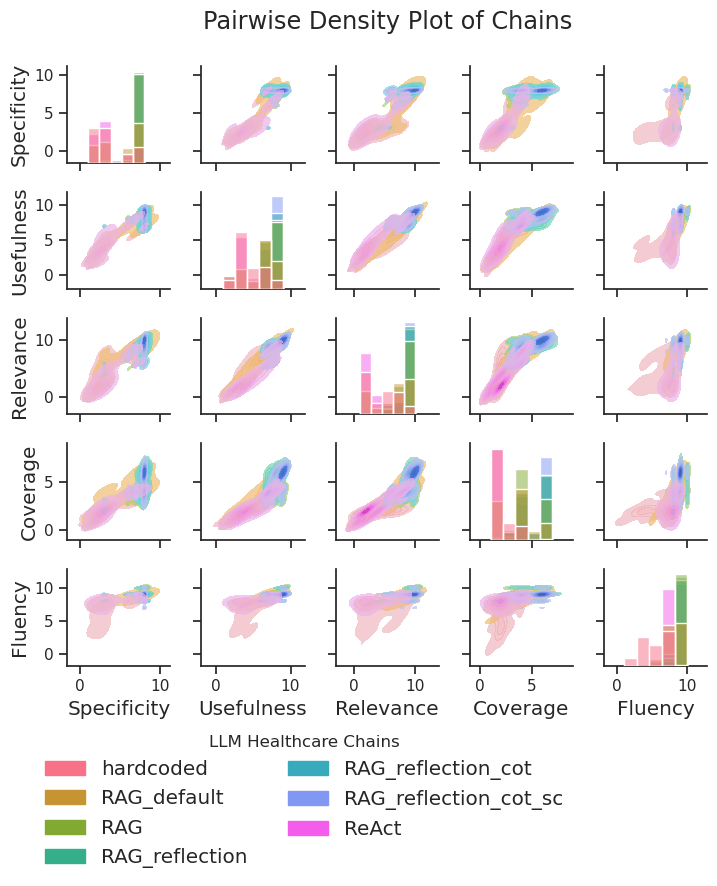

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'results' is your DataFrame
# Select the columns for the pairwise density plot
columns = ['Specificity', 'Usefulness', 'Relevance', 'Coverage', 'Fluency', 'Chains']
data = results[columns]

# Create a custom color palette using husl
color_palette = sns.husl_palette(len(data['Chains'].unique()))

# Set the figure size explicitly
plt.figure(figsize=(15, 15))

# Create the pairwise density plot
sns.set(style='ticks', font_scale=1)  # Increase the overall font scale
g = sns.PairGrid(data, hue='Chains', diag_sharey=False, palette=color_palette, height=4, aspect=1)
g.map_diag(sns.histplot, bins=5)
g.map_offdiag(sns.kdeplot, fill=True, alpha=0.7)

# Customize the plot
# g.fig.suptitle('Pairwise Density Plot Colored by Types of Chain Applications', y=1.02, fontsize='x-large')
g.fig.suptitle('Pairwise Density Plot of Chains', y=1.02, fontsize='x-large')

# Increase font size for x and y labels
g.axes[0, 0].set_ylabel(g.axes[0, 0].get_ylabel(), fontsize='x-large')
for ax in g.axes[-1, :]:
    ax.set_xlabel(ax.get_xlabel(), fontsize='large')
for ax in g.axes[:, 0]:
    ax.set_ylabel(ax.get_ylabel(), fontsize='large')

# Move the legend to the bottom of the plot
g.add_legend(title='LLM Healthcare Chains', loc='lower left', bbox_to_anchor=(0.05, -.075), ncol=2, fontsize='large', title_fontsize='large')

# Adjust the spacing manually
g.fig.subplots_adjust(top=0.95, bottom=0.2, left=0.1, right=0.9, hspace=0.3, wspace=0.3)

# Ensure the figure remains square
g.fig.set_size_inches(8, 8)

# Save the figure with the legend included
plt.savefig('pairwise_density_plot.pdf', bbox_inches='tight')
plt.savefig('pairwise_density_plot.png', dpi=600, bbox_inches='tight')
plt.show()

In [11]:
# import plotly.express as px

# # Assuming 'results' is your DataFrame
# fig = px.scatter_3d(results, x='Specificity', y='Usefulness', z='Relevance',
#                     color='app', size='Coverage', size_max=18,
#                     hover_data={'Fluency': ':.2f', 'app': True},
#                     title='3D Scatter Plot of Results')

# fig.update_layout(scene=dict(xaxis_title='Specificity',
#                              yaxis_title='Usefulness',
#                              zaxis_title='Relevance'))

# fig.show()

In [12]:
subset_columns = [
    'Specificity',
    'Usefulness',
    'Relevance',
    'Coverage',
    'Fluency',
    'rouge-1_f',
    'rouge-2_r', 
    'rouge-2_p',
    'rouge-2_f',
    'rouge-l_r',
    'rouge-l_p',
    'rouge-l_f',
    'NER2NER_med',
    'NER2NER_sym',
    'NER2NER_total'
]

subset_result  = results[subset_columns]

In [13]:
from sklearn.metrics import mutual_info_score
from scipy.stats import entropy

def normalized_mutual_info_score(x, y):
    mi_score = mutual_info_score(x, y)
    h_x = entropy(pd.Series(x).value_counts() / len(x))
    h_y = entropy(pd.Series(y).value_counts() / len(y))
    nmi_score = mi_score / min(h_x, h_y)
    return nmi_score

In [14]:
import numpy as np
import pandas as pd
from sklearn.metrics import mutual_info_score
from scipy.stats import entropy

def calculate_nmi_matrix(data, bins):
    n_features = data.shape[1]
    mi_matrix = np.zeros((n_features, n_features))
    nmi_matrix = np.zeros((n_features, n_features))

    for i in range(n_features):
        for j in range(n_features):
            if i <= j:
                x = pd.cut(data.iloc[:, i], bins)
                y = pd.cut(data.iloc[:, j], bins)
                mi_score = mutual_info_score(x, y)
                h_x = entropy(pd.Series(x).value_counts() / len(x))
                h_y = entropy(pd.Series(y).value_counts() / len(y))
                nmi_score = mi_score / min(h_x, h_y)
                mi_matrix[i, j] = mi_score
                mi_matrix[j, i] = mi_score
                nmi_matrix[i, j] = nmi_score
                nmi_matrix[j, i] = nmi_score

    mi_df = pd.DataFrame(mi_matrix, columns=data.columns, index=data.columns)
    nmi_df = pd.DataFrame(nmi_matrix, columns=data.columns, index=data.columns)
    return mi_df, nmi_df

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mutual_info_score

# Assuming 'subset_result' is the DataFrame with the selected columns

# Min/max normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(subset_result)
normalized_df = pd.DataFrame(normalized_data, columns=subset_result.columns)

# Correlation matrix
correlation_matrix = normalized_df.corr()

# Mutual information score matrix
def calculate_mi_matrix(data, bins):
    n_features = data.shape[1]
    mi_matrix = np.zeros((n_features, n_features))
    for i in range(n_features):
        for j in range(n_features):
            if i <= j:
                mi_score = mutual_info_score(pd.cut(data.iloc[:, i], bins), pd.cut(data.iloc[:, j], bins))
                mi_matrix[i, j] = mi_score
                mi_matrix[j, i] = mi_score
    return pd.DataFrame(mi_matrix, columns=data.columns, index=data.columns)

mi_matrix, nmi_matrix = calculate_nmi_matrix(normalized_df, bins=5)

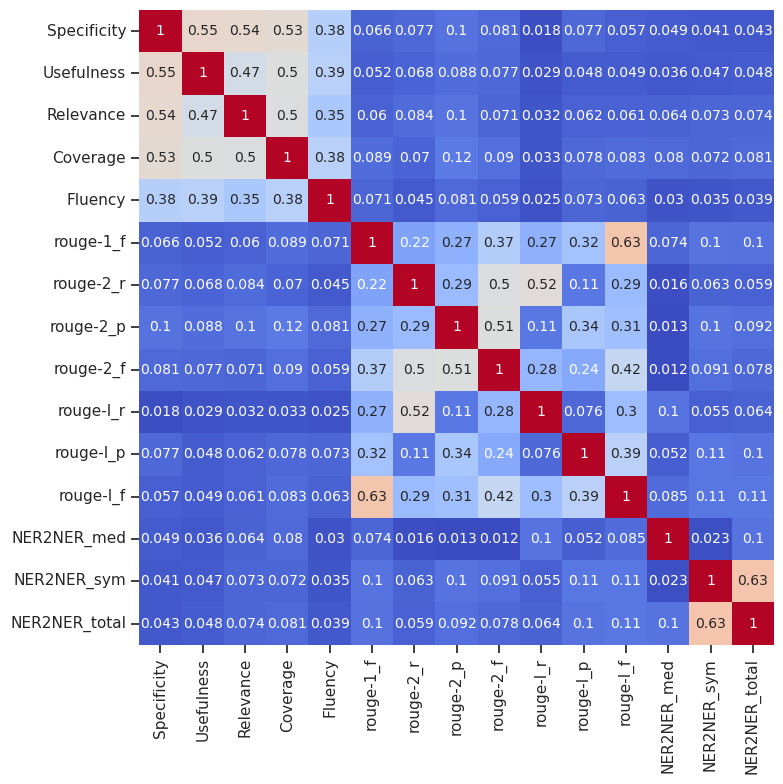

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, 
#             xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
# plt.title('Correlation Matrix Heatmap')
# plt.tight_layout()
# plt.show()

# Heatmap for mutual information score matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(mi_matrix, annot=True, cmap='coolwarm', square=True, 
#             xticklabels=mi_matrix.columns, yticklabels=mi_matrix.columns)
# plt.title('Mutual Information Score Matrix Heatmap')
# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
ax = sns.heatmap(nmi_matrix, annot=True, cmap='coolwarm', square=True, 
                 xticklabels=mi_matrix.columns, yticklabels=mi_matrix.columns,
                 cbar=False, annot_kws={'size': 10})  # Adjust the size here

# plt.title('Normalized Mutual Information Score Matrix Heatmap', fontsize=16)

# Adjust the plot to fill the figure
plt.tight_layout()

# Ensure the aspect ratio is maintained
ax.set_aspect('equal')
plt.savefig('MI.png', dpi=600)
plt.savefig('MI.pdf')
plt.show()

## Do the same for grouped score

In [17]:
grouped_data.shape

(7, 15)

In [18]:
# normalized_data

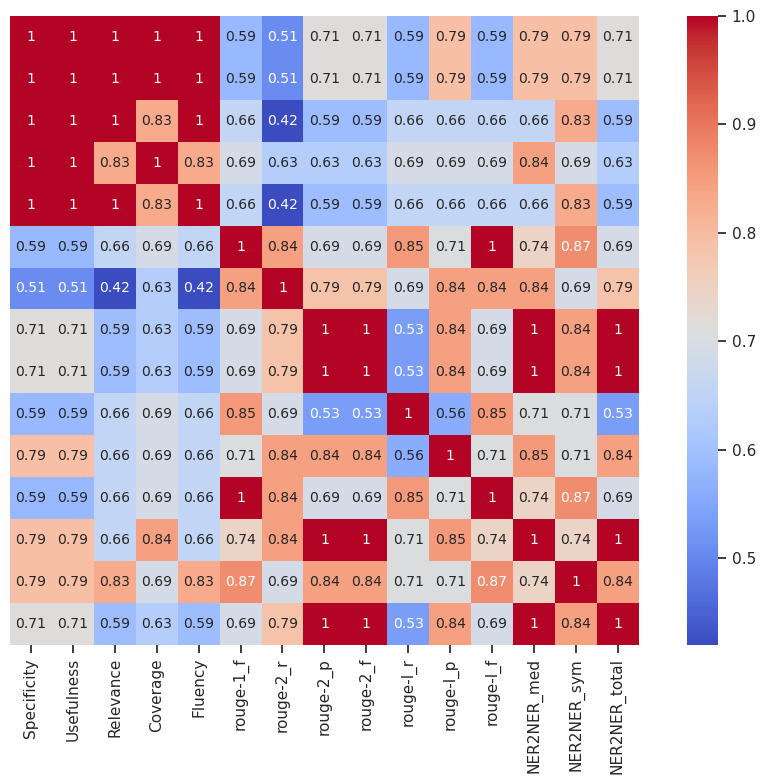

In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mutual_info_score
import seaborn as sns
import matplotlib.pyplot as plt

# Min/max normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(grouped_data)
normalized_df = pd.DataFrame(normalized_data, columns=grouped_data.columns)

# Correlation matrix
correlation_matrix = normalized_df.corr()

mi_matrix, nmi_matrix = calculate_nmi_matrix(normalized_df, bins=5)

# Heatmap for correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, 
#             xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
# plt.title('Correlation Matrix Heatmap (Grouped Data)')
# plt.tight_layout()
# plt.show()

# Heatmap for mutual information score matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(mi_matrix, annot=True, cmap='coolwarm', square=True, 
#             xticklabels=mi_matrix.columns, yticklabels=mi_matrix.columns)
# plt.title('Mutual Information Score Matrix Heatmap (Grouped Data)')
# plt.tight_layout()
# plt.show()

# Heatmap for mutual information score matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
ax = sns.heatmap(nmi_matrix, annot=True, cmap='coolwarm', square=True,
                 xticklabels=mi_matrix.columns, yticklabels=False,
                 cbar=True, annot_kws={'size': 10})  # Adjust the size here

# plt.title('Normalized MI Heatmap(Grouped by Chain Type)', fontsize=16)

# Adjust the plot to fill the figure
plt.tight_layout()

# Ensure the aspect ratio is maintained
ax.set_aspect('equal')
plt.savefig('MI_grouped.png', dpi=600)
plt.savefig('MI_grouped.pdf')
plt.show()